In [98]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle([ 'c', 'cornflowerblue', 'gold',
                              'darkorange','navy'])


def plot_results(X, Y_, means, covariances, index, title):
    splot=plt.subplot()
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .01, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlabel('log10 Distance to Nearest Source (arcseconds)')
    plt.ylabel('log10 Magnitude Difference')
    plt.title('Cross Match with GMMs')
    plt.savefig('images/GMM.png',dpi=150,bbox_inches='tight')

In [99]:
%matplotlib inline

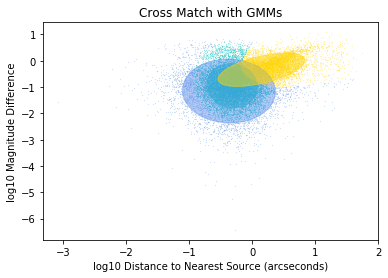

In [100]:
import pickle
X=pickle.load(open('dat.p','rb'))
X[:,0]=np.log10(X[:,0])
X[:,1]=np.log10(X[:,1])
dpgmm = mixture.BayesianGaussianMixture(n_components=3,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')



In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
h=fits.open('../color/data/dip.fits')

(-0.1, 0.1)

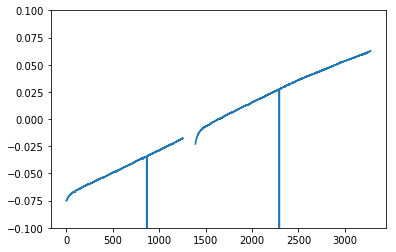

In [11]:
plt.plot(h[1].data['POS_CORR1'])
plt.ylim(-0.1,0.1)